# Worksheet 02

Name:  JINGYI ZHANG
UID: U26578499

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

A potential drawback is that it might overlook the intricacies of individual components early in the development process. Developers may make assumptions about lower-level functionality that could lead to issues when implementing the details, requiring significant revisions or rework. Additionally, it can lead to a delay in developing testable or demonstrable pieces of the application until much of the overall structure is defined, potentially impacting early feedback opportunities.

b) What is a drawback of the bottom up approach?

The main drawback here is the potential for integration challenges. While each component may work perfectly on its own, aligning them to function cohesively within the larger system can be difficult. Developers might find that components don’t integrate well due to mismatched interfaces or data models, leading to significant refactoring. Additionally, there's a risk of losing sight of the overall system architecture, resulting in a piecemeal system that may not meet the original design goals or user needs effectively.

c) What are 3 things you can do to have a better debugging experience?

1. Do not panic , keep calm down, do not think of fix quickly. Then, Read the error
When reading error, think of the following two questions
a. What is the error telling me?
b. Where did the error occur?
c Is this a cause or just a symptom (one bug can hide another)?


2. Re-read my whole code, Sanity check as possible.
Whe reading whole code, thinking of following three questions
a. Can I mentally trace through my code to reproduce the error in my head?
b. If not: your code may need some refactoring because it’s too complex!
c. Is everything set up properly? Are the things that are supposed to communicate actually
communicating?

3. Now look online for some help
○ Hopefully with the above out of the way I have a good idea what to search for in order
to actually fix the issue

d) (Optional) Follow along with the live coding. You can write your code here:

In [17]:
class Board:

    def __init__(self):
        self.board = [["-"for _ in range(8)] for _ in range(8)]

    def __repr__(self):
        res =""
        #for row in range(len(self.board)):
            #for col in range(len(self.board[row])):
        for row in range(8):
            for col in range(8):
                res += self.board[row][col]
                res += " "

            res += "\n"
        return res

    def set_queen_at(self, row, col):
         self.board[row][col]= "Q"
        
    def un_set_queen_on_row(self, row):
         self.board[row]= ["-"for _ in range(8)] 

    def is_valid_row(self,row,col):
        for j in range(8):
            if j != col and self.board[row][j]=="Q":
                return False
        return True
            
    def is_valid_col(self,row,col):
        for i in range(8):
            if i != row and self.board[i][col]=="Q":
                return False
        return True
        
    def is_valid_move(self,row,col):
         if not self.is_valid_row(row,col):
             return False
         if not self.is_valid_col(row,col):
             return False
         return True
        
    def get_queen_on_row(self,row):
        for i in range(8):
            if self.board[row]=="Q":
                return i
        raise ValueError("no queen on row")
    
    def find_solution(self):
        row = 0
        col = 0
        while row <8 :
            if self.is_valid_move(row,col):
                self.set_queen_at(row, col)
                row += 1
                col =0
            else:
                col += 1
                if col >=8:
                    col = self.get_queen_on_row(row-1)
                    col += 1
                    row -= 1
        print("Find a solution ")
        print(self)

test = Board()
#test.set_queen_at(1,1)
#print(test)
#test.un_set_queen_on_row(1)
#print(test)
test.find_solution()


Find a solution 
Q - - - - - - - 
- Q - - - - - - 
- - Q - - - - - 
- - - Q - - - - 
- - - - Q - - - 
- - - - - Q - - 
- - - - - - Q - 
- - - - - - - Q 



## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [14]:
#import pandas as pd

#df = pd.read_csv('train.csv')
num_rows_with_empty = df.isnull().any(axis=1).sum()
print("There are " + str(num_rows_with_empty) + " rows with at least one empty value")
#print("there are " +  str(...) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [15]:
#df = ...
#df.columns
# 计算每列NaN值的数量，并过滤出小于或等于200个NaN值的列
cols_to_keep = df.columns[df.isnull().sum() <= 200]

# 使用过滤后的列更新df
df = df[cols_to_keep]

# 输出更新后的列名
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [17]:
# 替换'Sex'列中的值：'male'为0，'female'为1
#，并显式转换类型
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)

# 显示DataFrame的前几行以验证更改
df.head()
#df['Sex'] = ...
#df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [18]:
def split_name(name):
    last_name, remainder = name.split(',', 1)
    title, remainder = remainder.split('.', 1)

    # 尝试提取括号内的内容，如果存在。这里只做基本处理。
    first_middle_name = remainder.split('(')[0].strip() if '(' in remainder else remainder.strip()

    # 分割剩余部分以尝试提取 First Name 和 Middle Name
    parts = first_middle_name.split()

    first_name = parts[0] if parts else ''  # 确保列表不为空
    middle_name = ' '.join(parts[1:]) if len(parts) > 1 else ''

    return pd.Series([last_name.strip(), title.strip(), first_name, middle_name])

# 应用函数，并创建新列
df[['Last Name', 'Title', 'First Name', 'Middle Name']] = df['Name'].apply(split_name)
#resorting
df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'First Name', 'Middle Name', 'Last Name', 'Title']]


#df[['First Name', 'Middle Name', 'Last Name', 'Title']] = ...
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [19]:
average_age = df['Age'].mean()

# 用平均年龄替换所有缺失的年龄值
df['Age'] = df['Age'].fillna(average_age)

#df['Age'] = ...
#i want to print from row 1 to row 10
df.iloc[0:10]
#df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C,Nicholas,,Nasser,Mrs


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

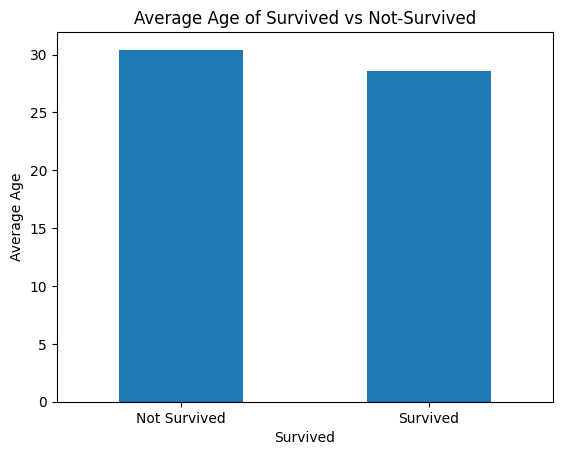

In [20]:
average_age_by_survival = df.groupby('Survived')['Age'].mean()
average_age_by_survival.plot(kind='bar')
plt.title('Average Age of Survived vs Not-Survived')
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)  # 改善x轴标签
plt.show()

This result shows that the average age of survived people is smaller than not survived people. This may because staff tended to 
rescure young people expecially children instead of old people expecially old people. Also, young people had more healthy body,
which helped them survive in the cold sea water.